In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
file_path = '../data/processed/one_year_price.csv'
data = pd.read_csv(file_path)
data.head()

Date        AAPL        AMZN        EEM         GLD  \
0  2023-04-03 00:00:00-04:00  165.287750  102.410004  38.504452  184.539993   
1  2023-04-04 00:00:00-04:00  164.750626  103.949997  38.504452  187.979996   
2  2023-04-05 00:00:00-04:00  162.890533  101.099998  38.202572  187.830002   
3  2023-04-06 00:00:00-04:00  163.785767  102.059998  38.358379  186.490005   
4  2023-04-10 00:00:00-04:00  161.169724  102.169998  38.397335  185.110001   

          JNJ         JPM         SPY        TSLA  
0  152.170090  125.811874  405.083954  194.770004  
1  153.761139  124.129982  402.836487  192.580002  
2  160.668701  124.315071  401.781738  185.520004  
3  160.222427  124.178696  403.349030  185.059998  
4  159.417206  124.587852  403.763000  184.509995

In [5]:
risk_free_rate = 0.

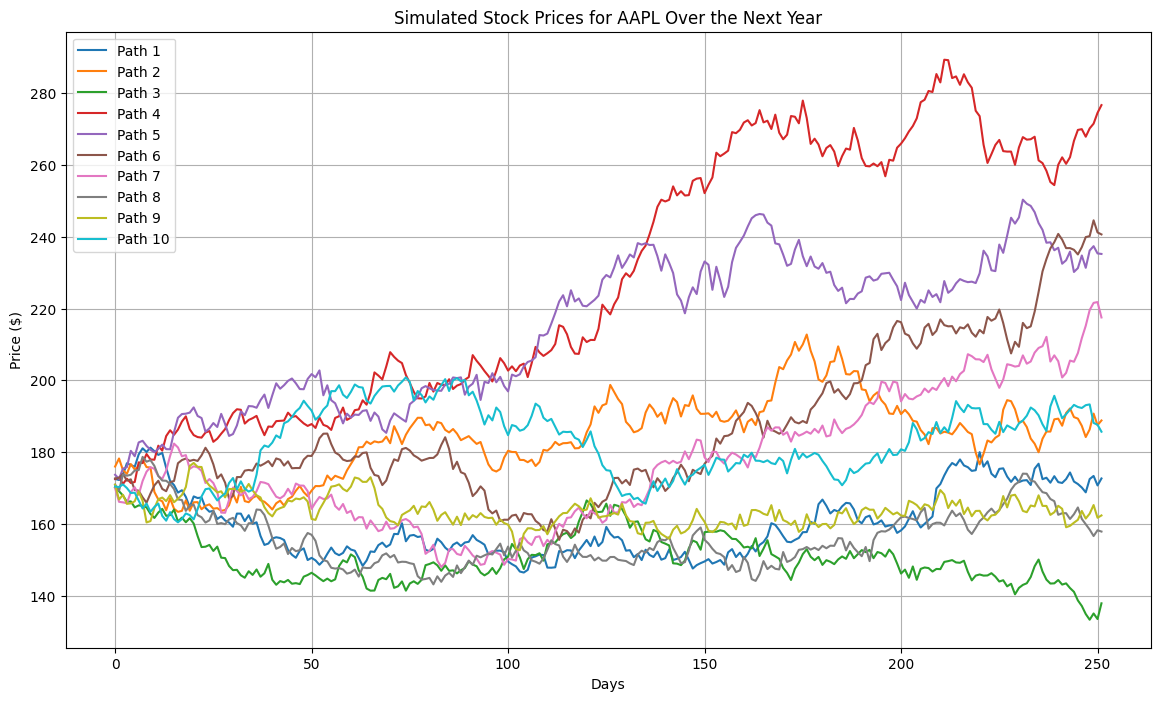

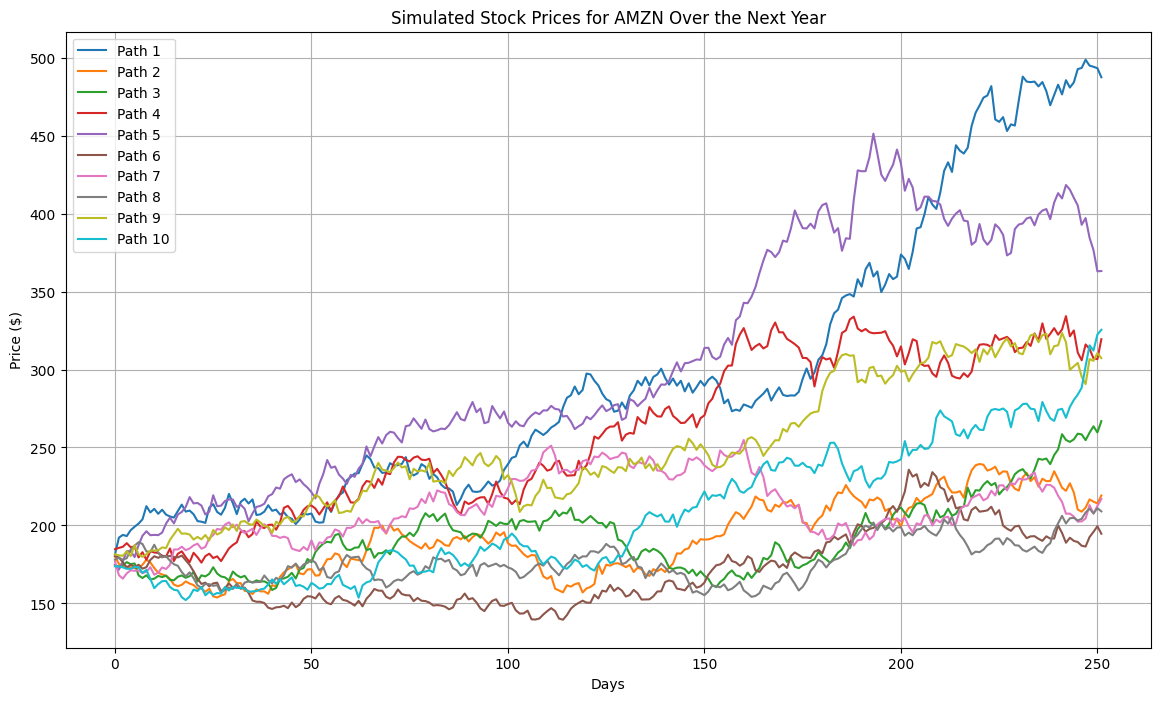

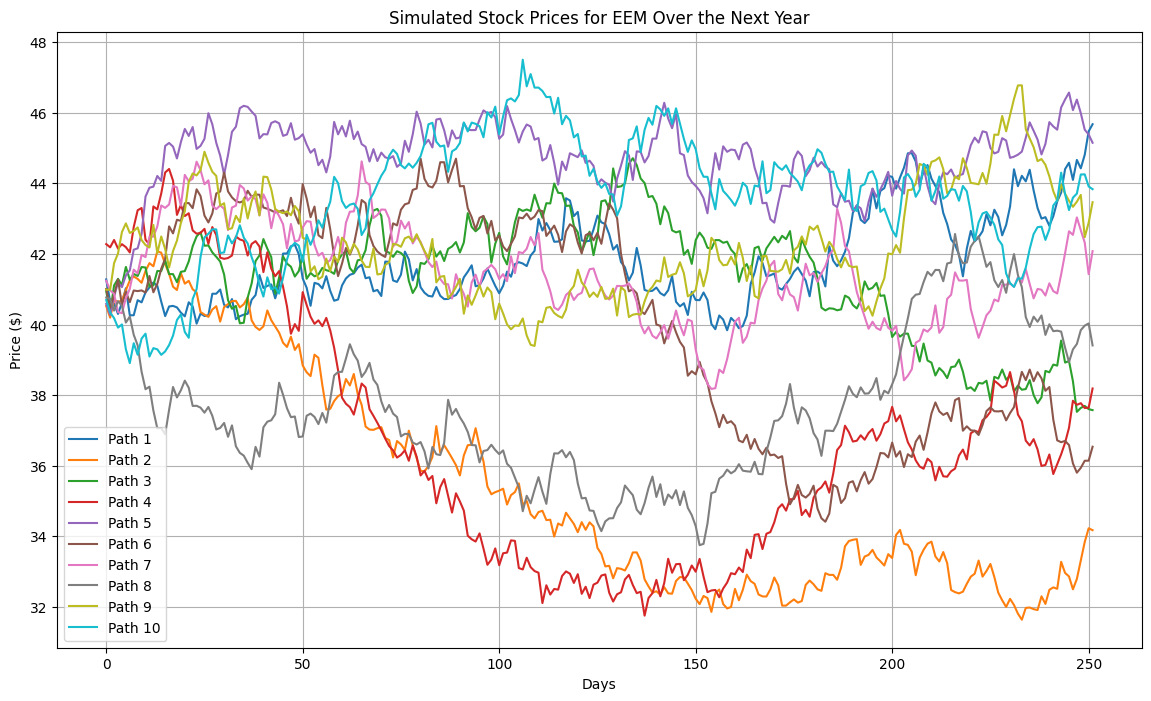

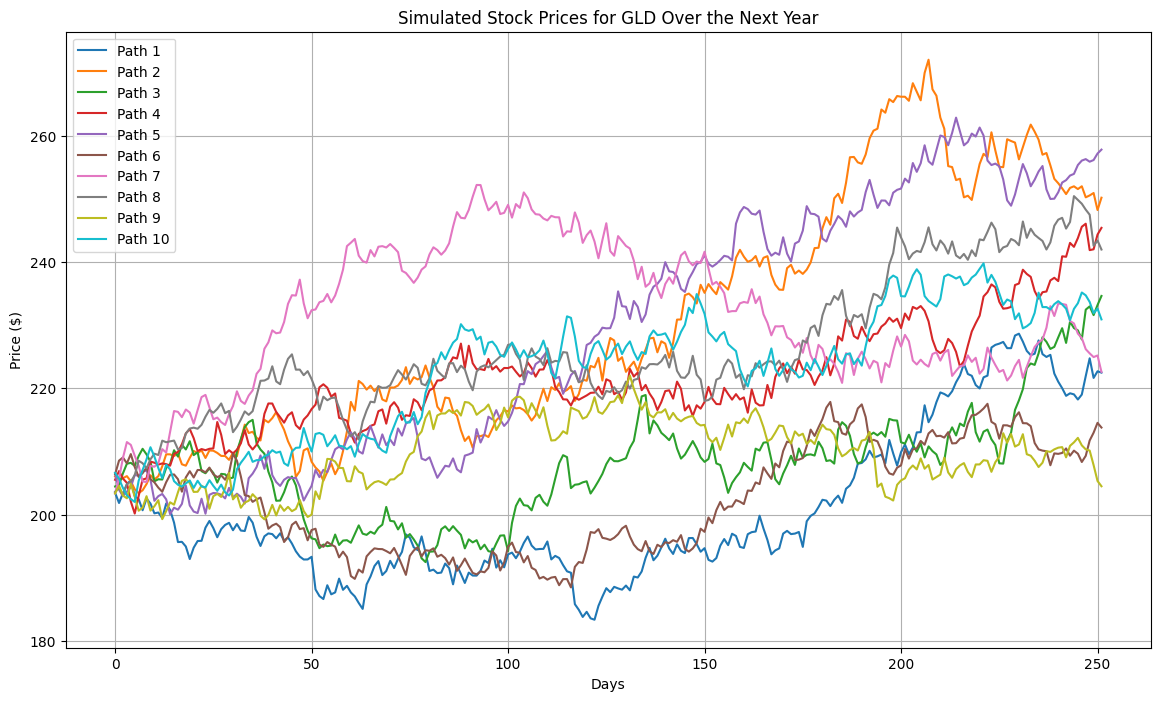

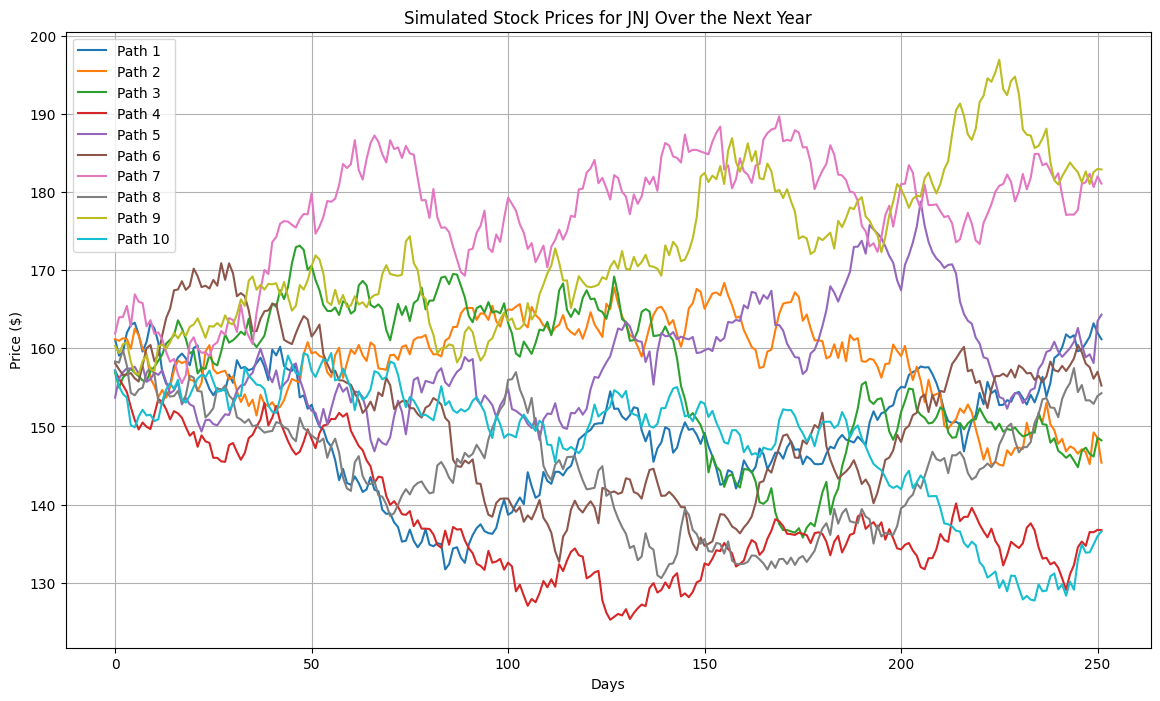

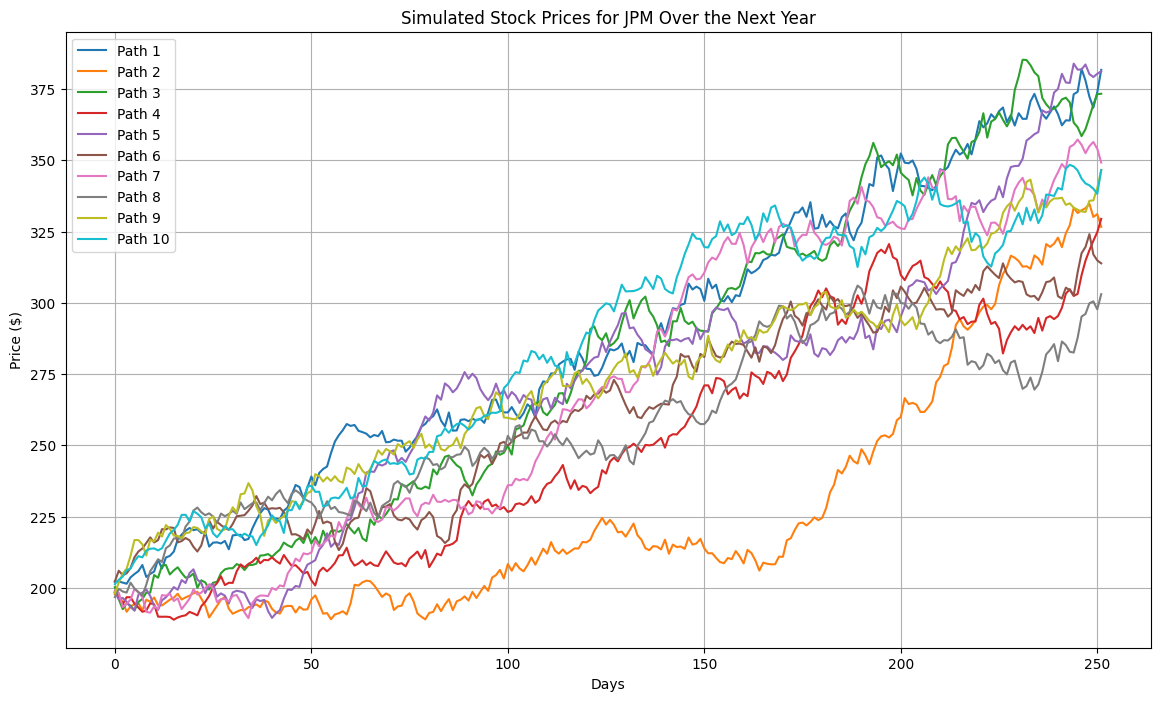

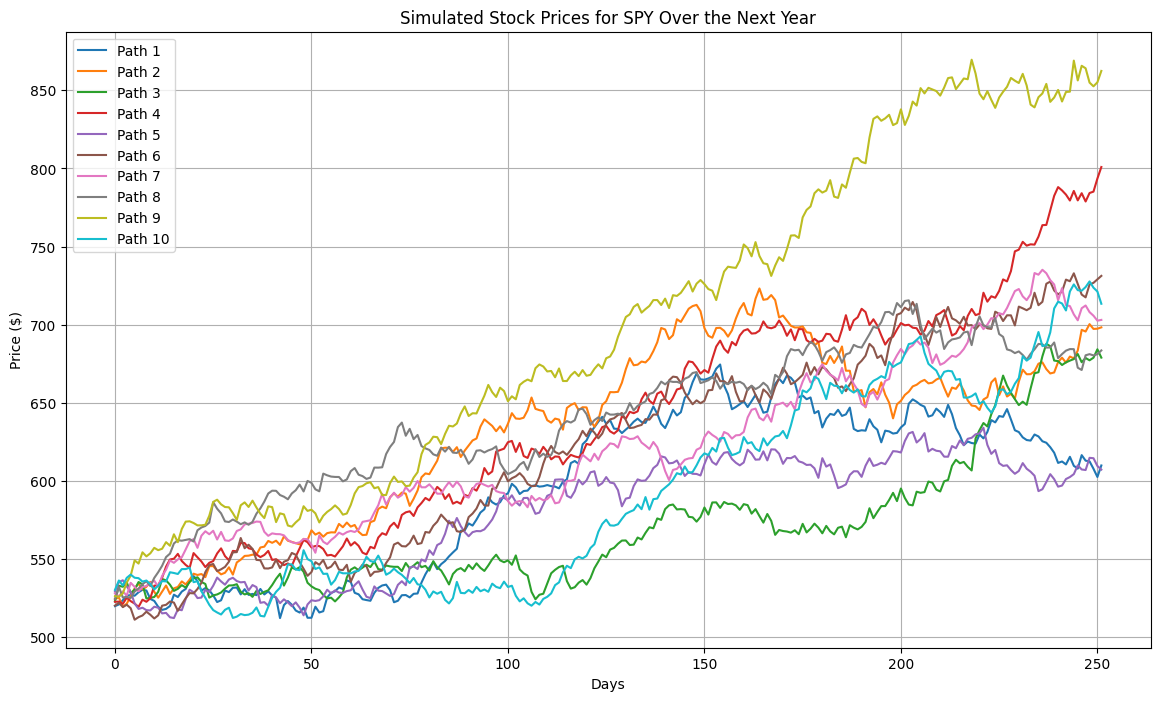

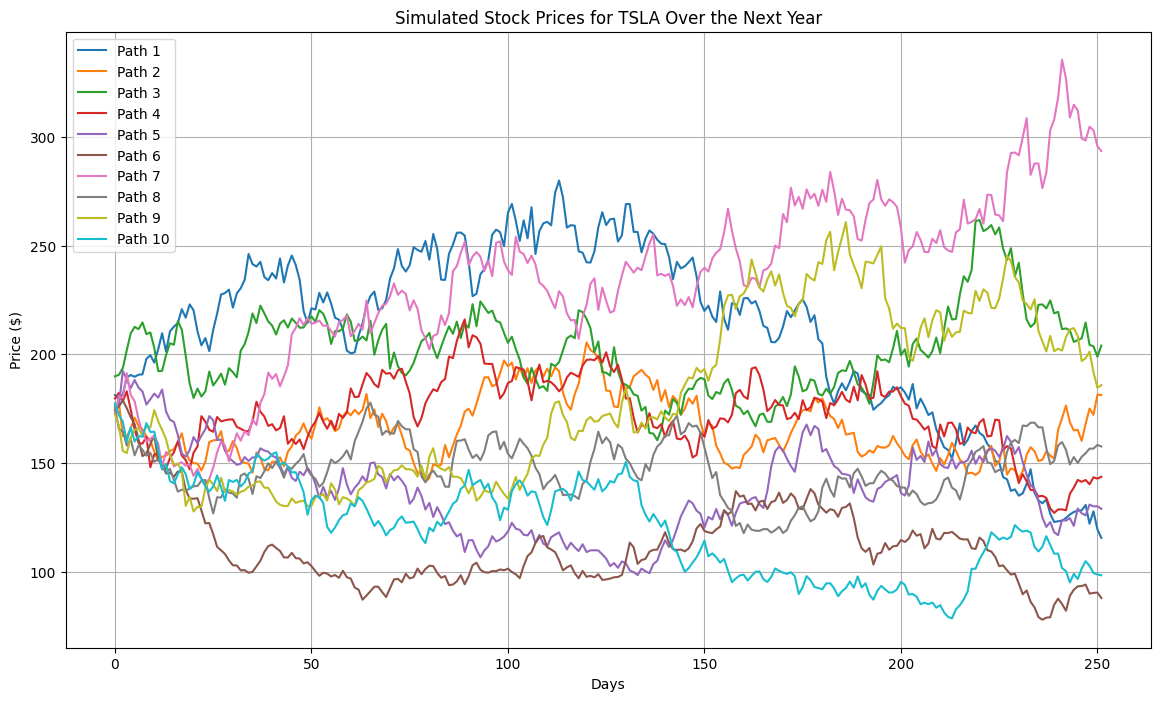

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

stock_data = data  # Assuming 'data' is already defined

# Remove any rows with missing values to avoid calculation errors
stock_data.dropna(inplace=True)

# List of stock symbols
stock_symbols = stock_data.columns[1:]  # Adjust if the first column isn't 'Date'

# Number of trading days to simulate
days = 252
t = np.arange(1, days + 1)

# Number of paths to simulate
num_paths = 20

# Seed for reproducibility
np.random.seed(42)

# Loop over each stock symbol
for symbol in stock_symbols:
    # Create a new figure for each stock
    plt.figure(figsize=(14, 8))
    
    # Calculate logarithmic returns
    returns = np.log(stock_data[symbol] / stock_data[symbol].shift(1))
    
    # Estimate parameters (annualized)
    mu = returns.mean() * 252
    sigma = returns.std() * np.sqrt(252)
    
    # Starting stock price (last available closing price)
    S0 = stock_data[symbol].iloc[-1]
    
    # Simulate multiple paths
    for i in range(num_paths):
        # Brownian motion
        W = np.random.standard_normal(size=days)
        W = np.cumsum(W)
        
        # Simulate prices using GBM
        prices = S0 * np.exp((mu - 0.5 * sigma**2) * t / 252 + sigma * W * np.sqrt(1/252))
        
        # Plot
        plt.plot(prices, label=f"Path {i+1}")

    # Customize the plot
    plt.title(f'Simulated Stock Prices for {symbol} Over the Next Year')
    plt.xlabel('Days')
    plt.ylabel('Price ($)')
    plt.legend()
    plt.grid(True)
    plt.show()


Merton Model

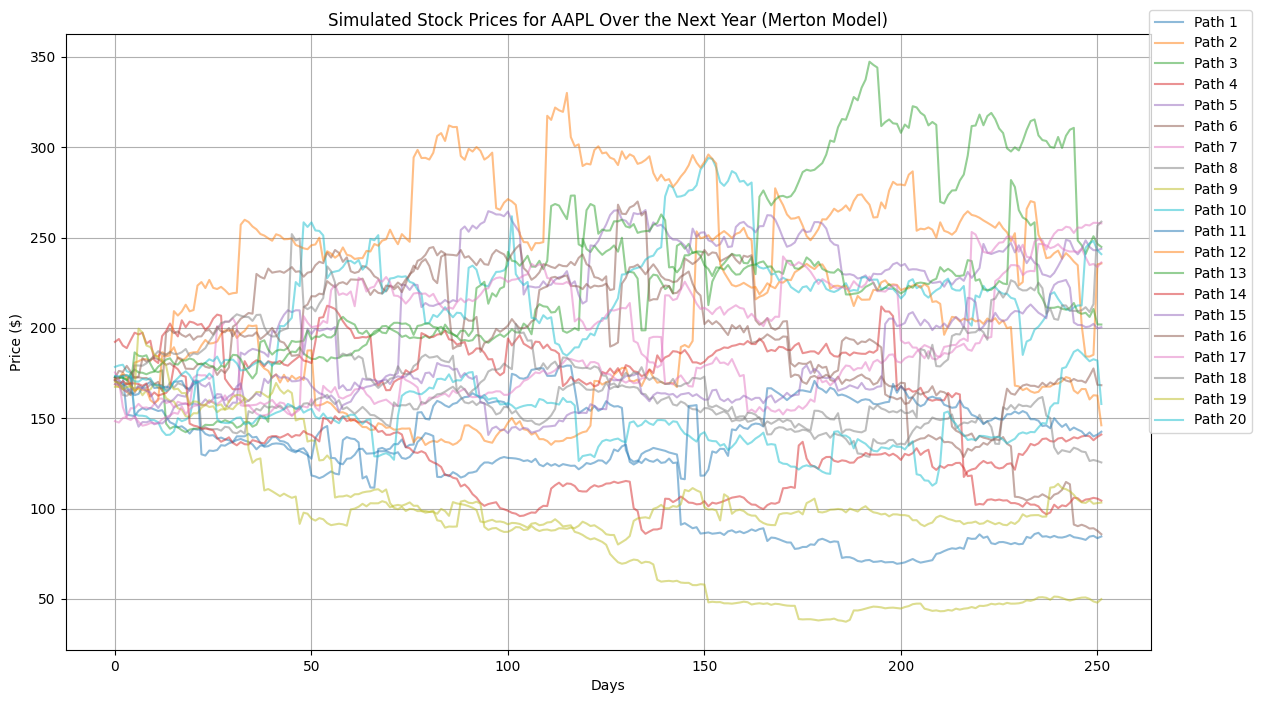

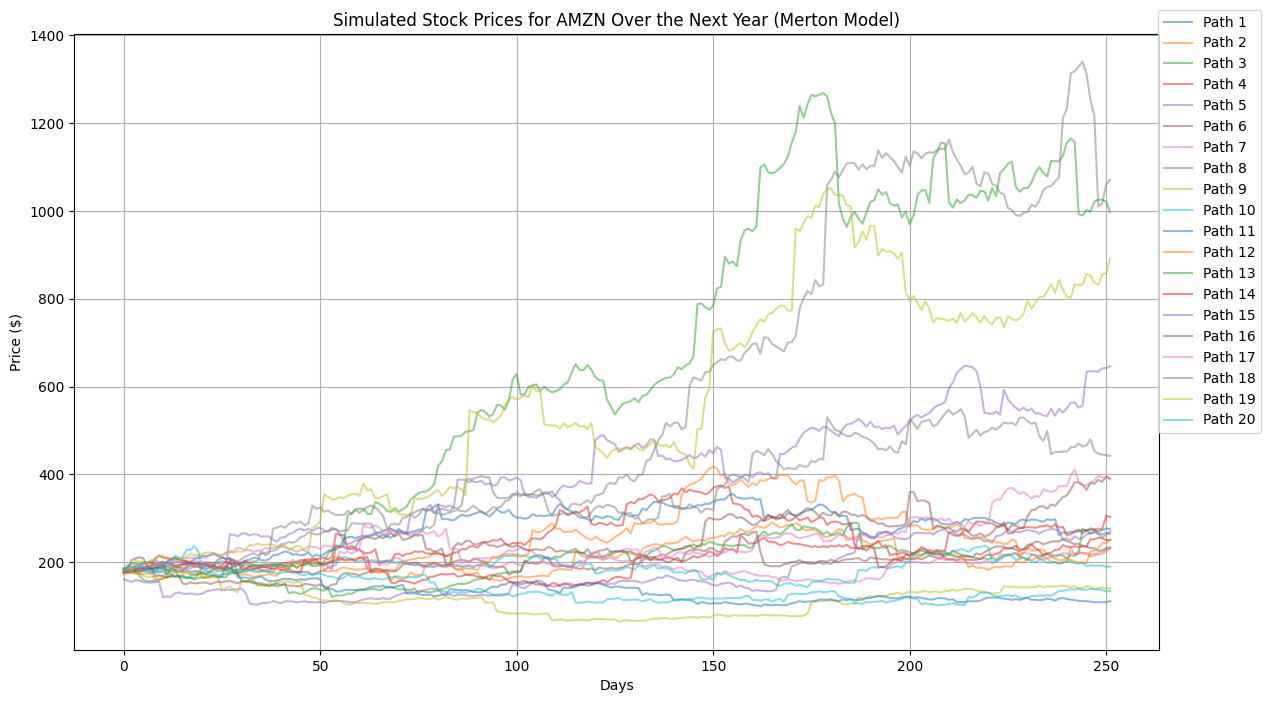

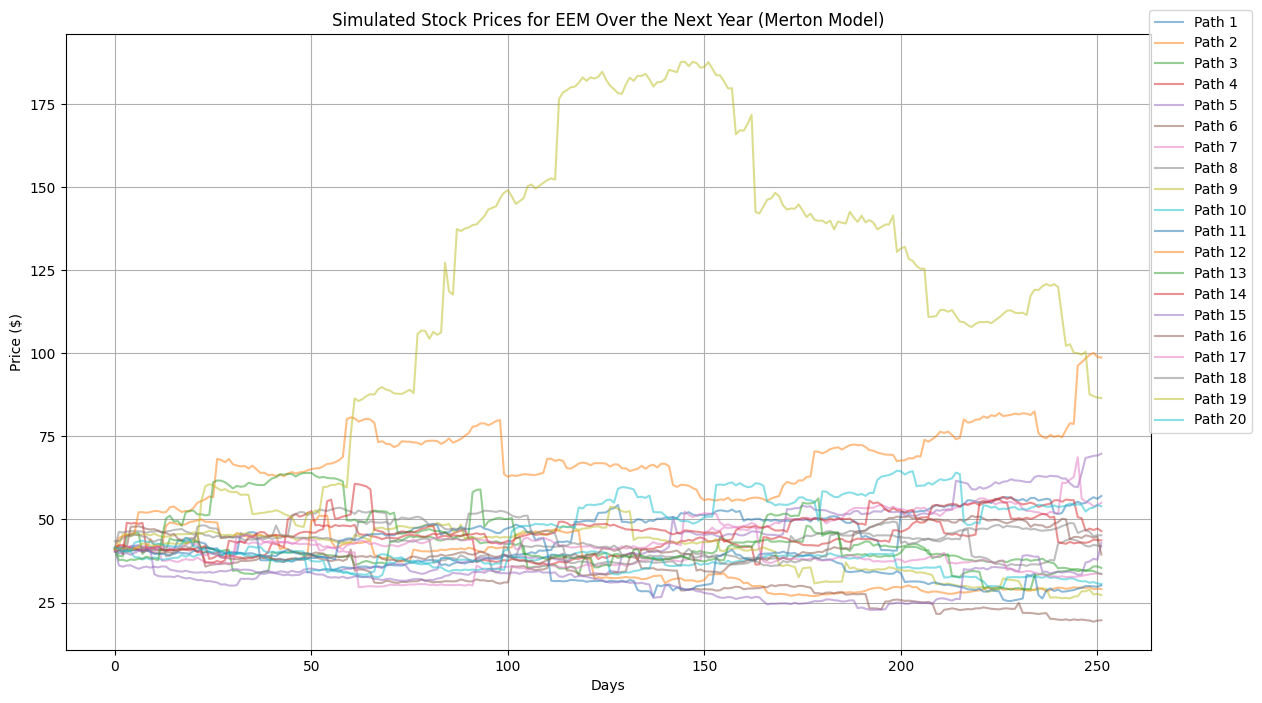

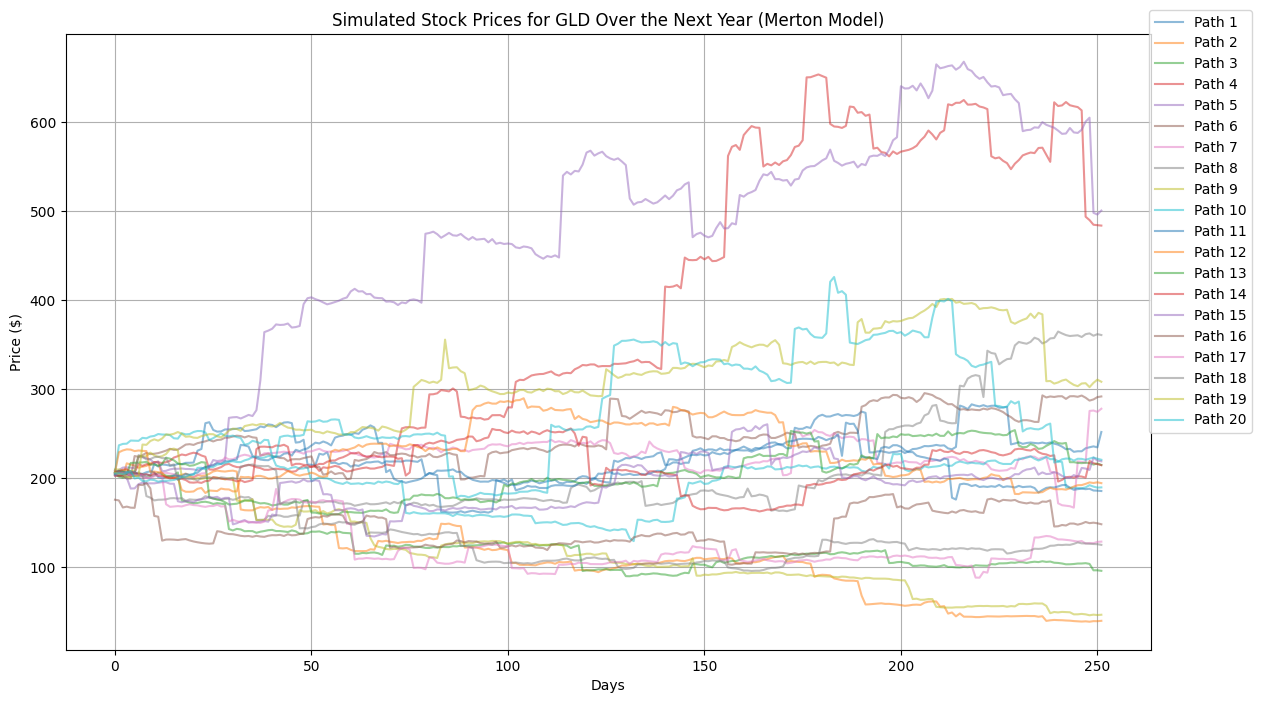

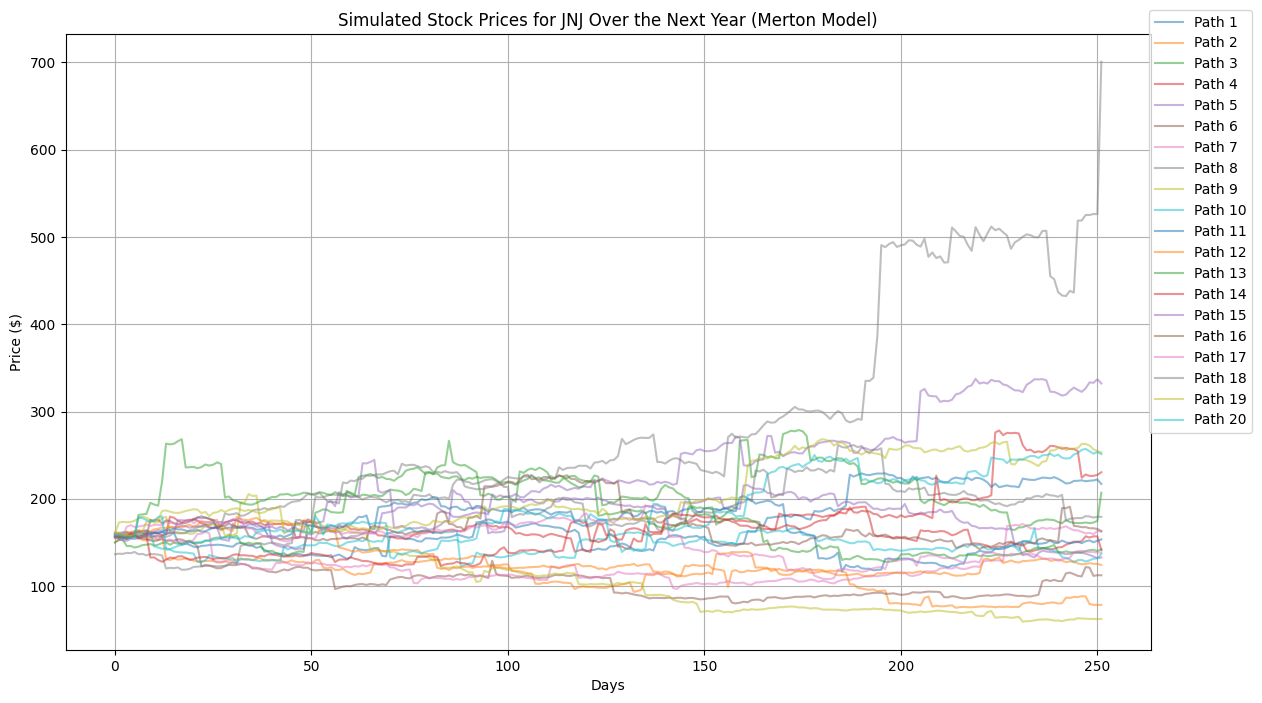

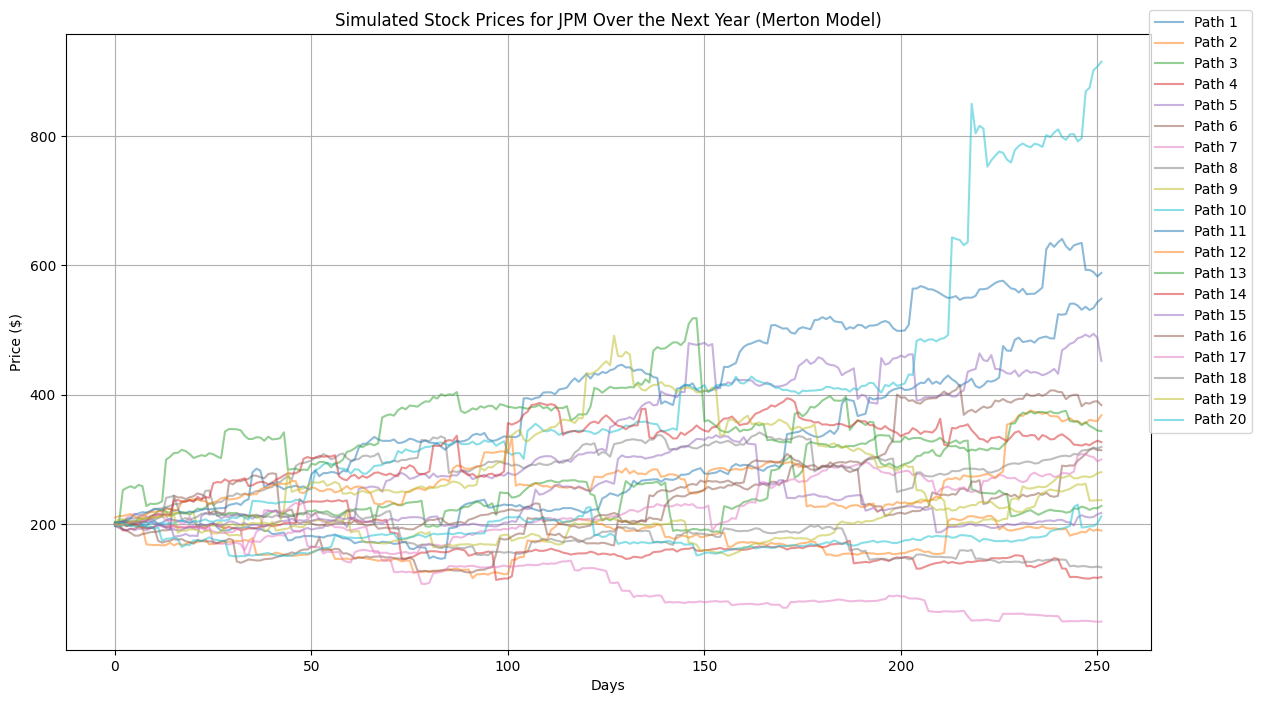

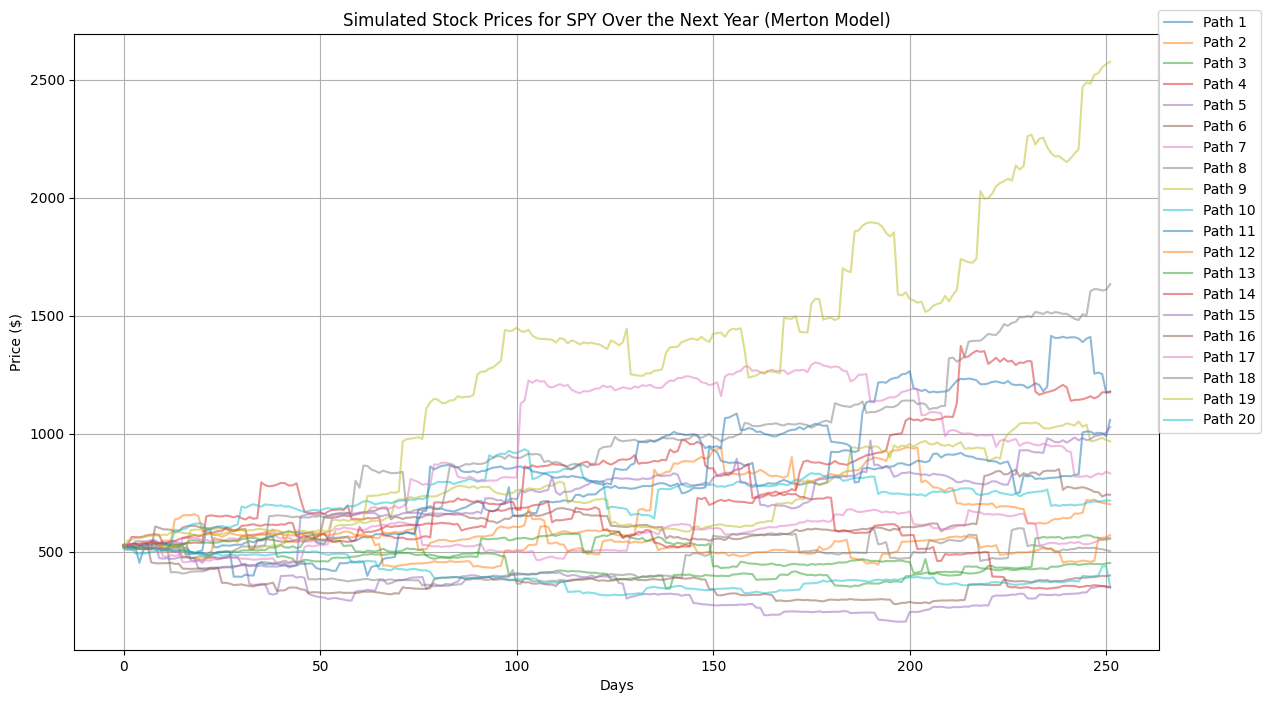

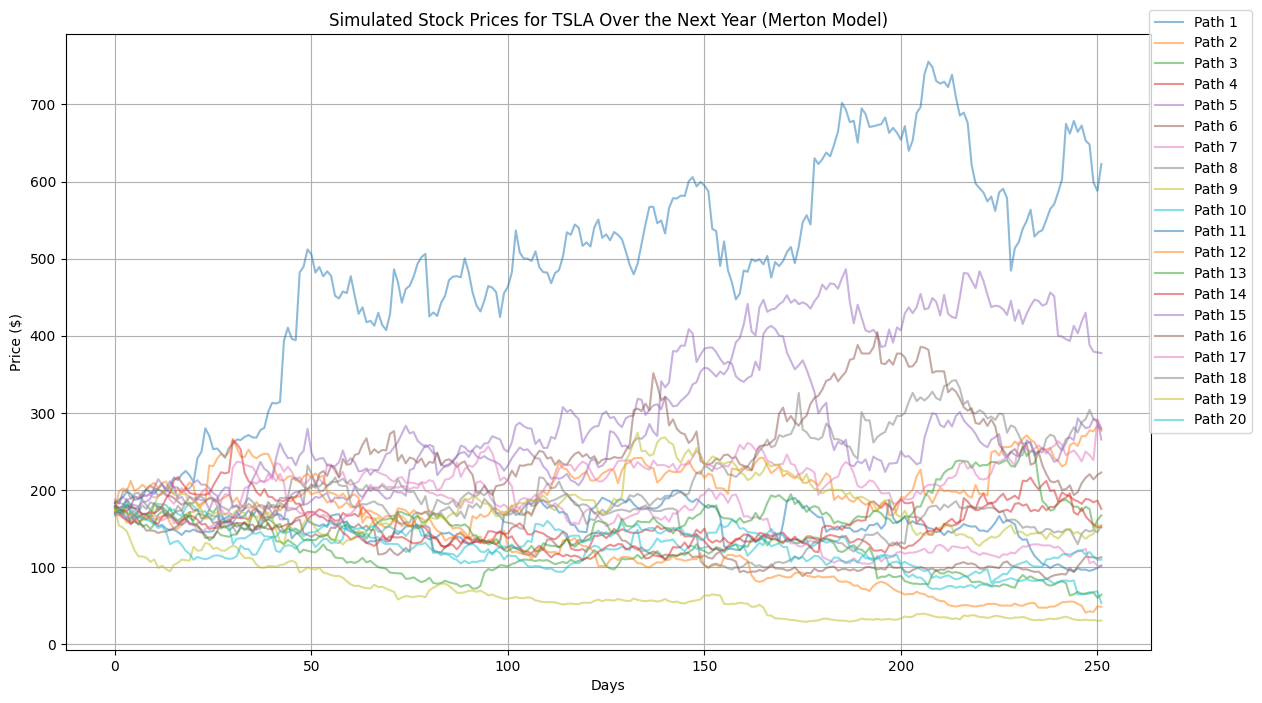

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

stock_data = data  # Assuming 'data' is already defined

# Remove any rows with missing values to avoid calculation errors
stock_data.dropna(inplace=True)

# List of stock symbols
stock_symbols = stock_data.columns[1:]  # Adjust if the first column isn't 'Date'

# Number of trading days to simulate
days = 252
t = np.arange(1, days + 1)

# Number of paths to simulate
num_paths = 20

# Seed for reproducibility
np.random.seed(42)

# Loop over each stock symbol
for symbol in stock_symbols:
    # Set up the plot for this stock
    plt.figure(figsize=(14, 8))
    
    # Calculate logarithmic returns
    returns = np.log(stock_data[symbol] / stock_data[symbol].shift(1))
    
    # Estimate parameters (annualized)
    mu = returns.mean() * 252
    sigma = returns.std() * np.sqrt(252)
    
    # Starting stock price (last available closing price)
    S0 = stock_data[symbol].iloc[-1]
    
    # Simulate multiple paths
    for i in range(num_paths):
        # Brownian motion
        W = np.random.standard_normal(size=days)
        W = np.cumsum(W)

        # Simulate jumps using a compound Poisson process
        # Assuming jump intensity lambda_, jump mean mu_jump, and jump volatility sigma_jump
        lambda_ = 0.1  # Jump intensity per day
        mu_jump = 0.0  # Mean of jump size
        sigma_jump = 0.1  # Standard deviation of jump size

        # Total number of jumps
        n_jumps = np.random.poisson(lambda_ * days)
        jump_sizes = np.random.normal(mu_jump, sigma_jump, n_jumps)
        jump_times = np.random.choice(days, n_jumps, replace=False)

        # Initialize an array to store jumps
        J = np.zeros(days)
        for time, size in zip(jump_times, jump_sizes):
            J[time] += size

        # Simulate prices using Merton model
        prices = S0 * np.exp((mu - 0.5 * sigma**2) * t / 252 + sigma * W * np.sqrt(1/252) + J.cumsum())

        # Plot
        plt.plot(prices, label=f"Path {i+1}", alpha=0.5)

    # Customize the plot for this stock
    plt.title(f'Simulated Stock Prices for {symbol} Over the Next Year (Merton Model)')
    plt.xlabel('Days')
    plt.ylabel('Price ($)')
    plt.legend(loc='upper right', bbox_to_anchor=(1.1, 1.05))
    plt.grid(True)
    plt.show()
